In [35]:
import random
import math
import pandas as pd
import numpy as np
import time

# TASK 1. Hashing task!

In [30]:
from bitarray import bitarray
import sys
import csv
import numpy as np

In [31]:
import hashing_lib

## Understanding Bloom Filter

passwords1.txt
passwords2.txt

The first dataset represents the "pool" of passwords and we will have to find how many passwords of the second dataset are already present in the pool
The filter should:
    takes as input the 2 datasets, 
    add to the filter all the passwords in the first dataset (passwords1), 
    check which password of the seconds dataset (password2) is present in the filter,
    returns a series of values (execution time, prob of false positive...)
    

In [32]:
# Passwords 1
passwords1=[]
with open('passwords1.txt', 'r') as f:
    for i in range(20000):
        a= list(f.read((i+1)*21))[21*i:]  
        passwords1.append(''.join(a[:-1]))

In [33]:
# Passwords 2

passwords2=[]

with open('passwords2.txt', 'r') as f:
    for i in range(10000):
        a= list(f.read((i+1)*21))[21*i:]  
        passwords2.append(''.join(a[:-1]))

In [42]:
hashing_lib.BloomFilter(passwords1, passwords2)

75
Number of hash function used:  4
Number of duplicates detected:  75
Probability of false positives:  0.01
Execution time:  8.090763330459595


# Task 2. Alphabetical Sort

### First, Implementation of counting sort for list of integer. 
- Input: List of interger
- Output: Sorted list of integer using counting sort implementation
- reference: www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php

In [44]:
def counting_sort (lists):
    k = max(lists)
    aux_size = k + 1
    # temp list to store th
    aux = [0] * aux_size
    for item in lists:
        # calculate occurance
        aux[item] += 1
    i = 0
    # sort the element
    for item in range(aux_size):
        for a in range(aux[item]):
            lists[i] = item
            i += 1
    return lists

show the result

In [45]:
counting_sort([1, 2, 7, 3, 2, 1, 4, 2, 3, 2, 1])

[1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 7]

The Complexity of the program is $$O(n)= ((k+1).n)$$

### Second, Implementation of counting sort for list of Characters. 
- Input: List of character
- Output: Sorted list of character using counting sort implementation

In [47]:
def counting_sort_2 (lists):
    #Prepare temporary list, one to accomodate the ord() indexes and ordering the input
    # 127 is the maximum allocation of ascii tabe that contain latin letters
    # source : http://www.asciitable.com/
    temp = aux = [0] * 127 
    # build a result list
    result = [""] * len(lists)
    # calculate the occurance
    for item in lists: 
        aux[ord(item)] += 1
    #update the aux list
    for i in range(127): 
        aux[i] += aux[i-1]
    for i in range(len(lists)):
        #fill each element of the list based on ord() value of aux list
        temp[aux[ord(lists[i])]-1] = lists[i] 
        #update the value of aux list, count out for each process
        aux[ord(lists[i])] -= 1
    # return the result
    for item in range(len(lists)): 
        result[item] = temp[item] 
    return result  

show the result

In [49]:
print(counting_sort_2('ilovedatascience'))

['a', 'a', 'c', 'c', 'd', 'e', 'e', 'e', 'i', 'i', 'l', 'n', 'o', 's', 't', 'v']


The Complexity of the program is $$O(n)= (n)$$

### Third, Implementation of counting sort for list of Words
- Input: List of Words
- Output: Sorted list of words using counting sort implementation

In [ ]:
def counting_sort_words(lists):
    #maximum length of word in the list
    k = max(map(len, list))
    #length of list
    n = len(lists)
    #size of aux list
    aux_size = k+1
    #initiate the aux array of list with dimention nx(aux_size)
    aux = np.zeros((n,aux_size), dtype = int)
    for k, v in enumerate(lists):
        #fill the element of array with number of 
        aux[k, range(len(v))] = list(map(ord, lists.lower()))
        

so far, we only can build function to read list of words, and store them in aux list to e pro

# TASK 3. Find Similar Wines!

 We implemented our version of the k-means clustering algorithm. Afterward, we performed the clustering analysis by using our implementations on the provided dataset

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [15]:
import importlib
importlib.reload(clustering_lib)

<module 'clustering_lib' from '/home/flaminia/Documents/Sapienza/ADM/HOMEWORS/HW4/clustering_lib.py'>

In [3]:
import clustering_lib

Relevant Information about the `wine.data` dataset:
- no null values
- Threee classes:
   + class 1 -> 59 instances
   + class 2 -> 71 instances
   + class 3 -> 48 instances
- These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
-  The attributes (all continuous )are:
    + Alcohol
    + Malic acid
    + Ash
    + Alcalinity of ash  
    + Magnesium
    + Total phenols
    + Flavanoids
    + Nonflavanoid phenols
    + Proanthocyanins
    + Color intensity
    + Hue
    + OD280/OD315 of diluted wines
    + Proline  

In [4]:
dataf = clustering_lib.get_data('wine.data')

Before applying Kmeans we need to normalize the data

In [5]:
normalized= clustering_lib.normalize(dataf)

### Elbow method 

In [20]:
from sklearn.cluster import KMeans

 We have done the elbow method to be sure there are three clusters and not more or less. We run the elbow method on different features of the dataset in order to see if the optimal number of clusters changes. It resulted that the optimal number remains 3.
 
 Here an example

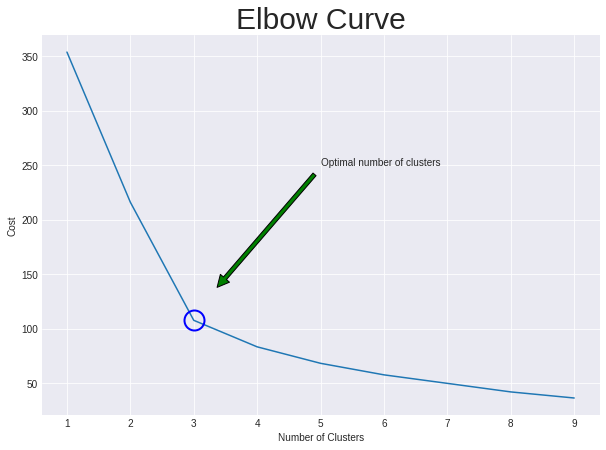

In [21]:
clusters=[i for i in range(1,10)]
score=[]
sd={}
for i in range(1,10):
    slicei= normalized[ ['Alcohol', 'Malic acid']]
    modeli= KMeans(n_clusters = i, init="k-means++")
    modeli.fit(slicei)
    score.append(modeli.inertia_)
    sd[i] = modeli.inertia_
    
x= list(sd.keys())
y= list(sd.values())
plt.style.use('seaborn-darkgrid') #style used
fig = plt.figure(figsize=(10, 7))
plt.plot(clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve', size=30)

plt.annotate('Optimal number of clusters',
             xy=(x[2]+.3, y[3]+50), xytext=(5,250),
             arrowprops= dict(facecolor='green', shrink=0.04) )

plt.plot(x[2], y[2], 'o', ms=20, mec='blue', mfc='none', mew=2)

plt.show()

Now that we know that there are three clusters, we can visualize a scatter plot with unclustered data represented by *Alcohol* and *Malic acid* 

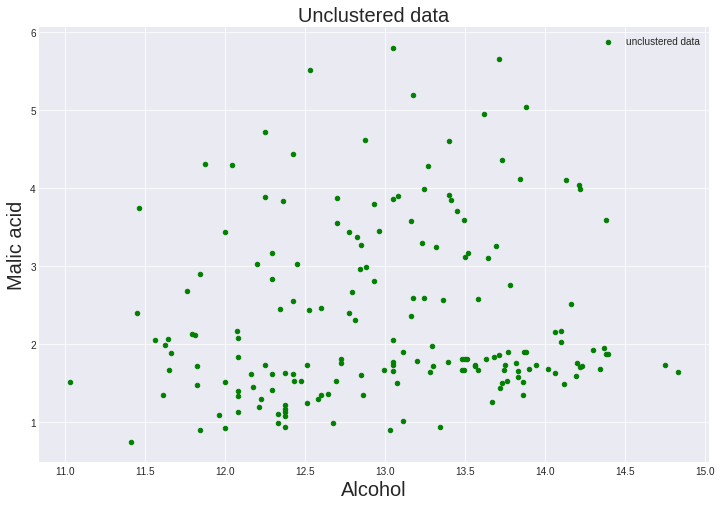

In [12]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(dataf['Alcohol'], dataf['Malic acid'],label='unclustered data', c='green', s=20)
plt.xlabel('Alcohol', size= 20)
plt.ylabel('Malic acid', size= 20)
plt.legend()
plt.title('Unclustered data', size= 20)
plt.show()

In this 3D version, we can see a scatterplot that visualize *Alcohol*, *Malic acid*, *Ash*.

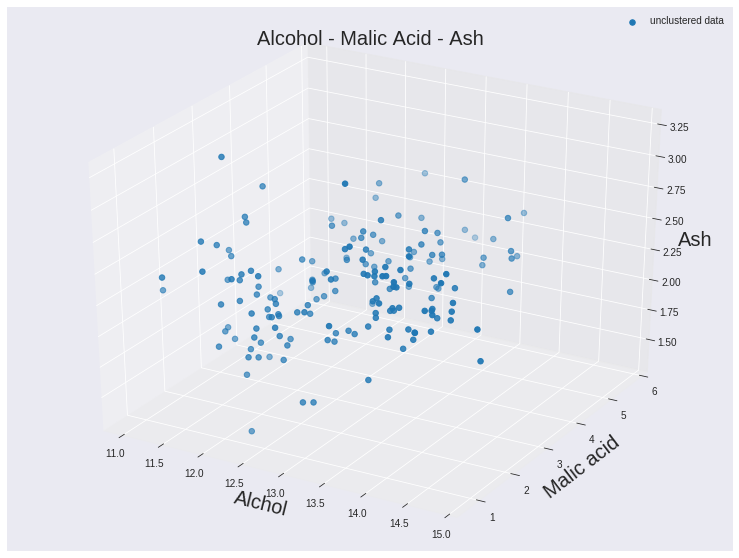

In [13]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d', )
ax.scatter(dataf['Alcohol'],dataf['Malic acid'],dataf['Ash'], label='unclustered data', s=30 )
plt.title('Alcohol - Malic Acid - Ash', size=20)
plt.legend()
ax.set_xlabel('Alchol', size=20)
ax.set_ylabel('Malic acid', size=20)
ax.set_zlabel('Ash', size=20)
plt.show()

Choose three centroids at random in our dataset

In [6]:
K=3
centroids= clustering_lib.choose_centroids(normalized, K)  # centroids are a list in which elements is the list of coordinates of each center

Next step is to choose the number of iterations which might guarantee convergence. We need to try many possibilities to find optimum number of iterations required for convergence. There is no need to choose a very large number because say at 100th iteration, if the centroids arrived to their true location or best possible location, even after performing 1000 extra iterations, the algorithm will give same results. So for convenience choosing number of iterations as 100

In [7]:
n_iter=100

We find the euclidian distance from each point to all the centroids and store in a X (rows) K matrix. So every row in 'distances' matrix will have distances of that particular data point from all the centroids. Next, we shall find the minimum distance of each point from each centroids and assign each point in the right cluster.
We repeat this enought times (in our case, we choose 100 times).

Now it's time to apply the function kMeans implemented by us. This returns the clusters we were looking for.

In [8]:
clusters1 = clustering_lib.kMeans(K, n_iter, normalized, centroids)

Execution time:  8.87059235572815


Here we add a column to our dataframe with the ending class (the one predicted by our KMeans) the starting class of each wine (point)

In [10]:
clu1=[]
for i in range(len(normalized)):
    for j in range(3):
        if list(normalized.loc[i]) in clusters1[j]:
            clu1.append(j)
            
normalized["class 1"]= clu1

In [11]:
with open('wine.data', 'r') as f:
    data= list(f.readlines())

for i in range(len(data)):
    data[i]= data[i][:-1]
    data[i]= list(map(float, data[i].split(',')))
    
features=['Target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 
        'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
        'OD280/OD315 of diluted wines','Proline']

wine= pd.DataFrame(data, columns=features)

lista = list(wine["Target"])
for i in range(len(lista)):
    if int(lista[i])==1:
        lista[i]=0    
    elif int(lista[i])==2:
        lista[i]=1   
    elif int(lista[i])==3:
        lista[i]=2    
        
normalized["Old class"]= lista
#clustering_lib.difference(normalized["Old class"], normalized['class']

In [14]:
normalized.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class 1,Old class
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0,0


 ### We can visualize the clusterd data

### 2-D

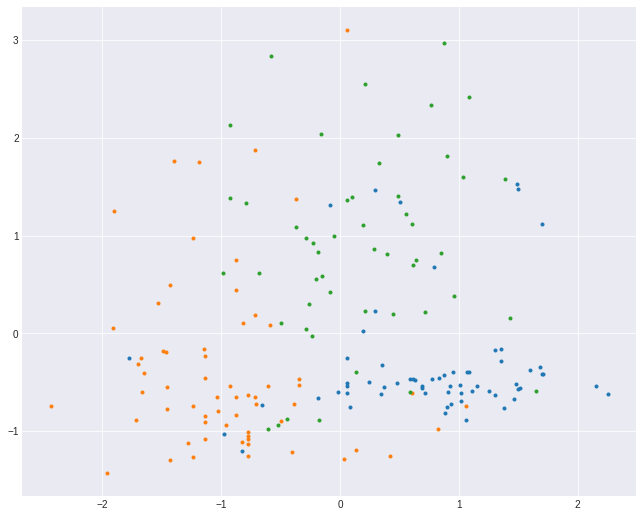

In [22]:
fig = plt.figure(figsize=(11, 9))
for i in range(3):
    plt.scatter(normalized[normalized['class 1'] == i ]['Alcohol'],
               normalized[normalized['class 1'] == i ]['Malic acid'],
               marker='.')
plt.show()

### 3-D 

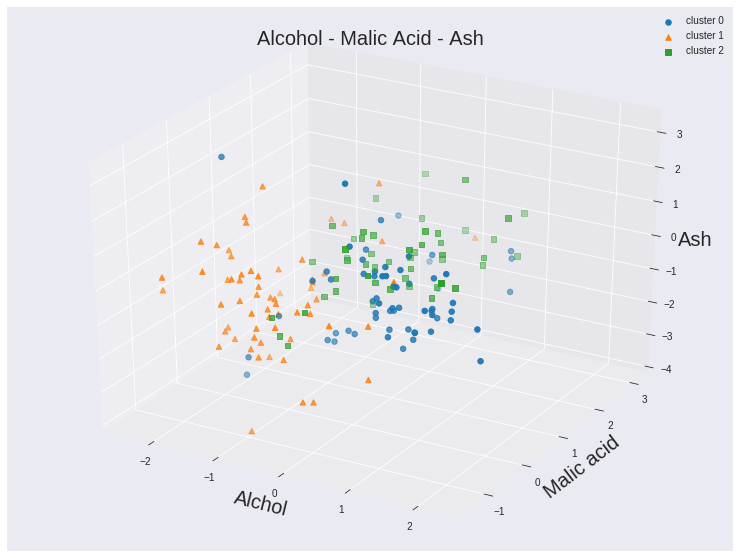

In [23]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d', )

for i,m in [(0,'o'), (1,'^'),(2,'s')]:
    lab= 'cluster '+str(i)
    ax.scatter(normalized[normalized['class 1'] == i ]['Alcohol'],
               normalized[normalized['class 1'] == i ]['Malic acid'],
               normalized[normalized['class 1'] == i ]['Ash'], 
               marker=m, label=lab, s=30)

plt.title('Alcohol - Malic Acid - Ash', size=20)
plt.legend()

ax.set_xlabel('Alchol', size=20)
ax.set_ylabel('Malic acid', size=20)
ax.set_zlabel('Ash', size=20)

plt.show()

We also build another implementation of KMeans, called *KMeans Min Max*. This version of the algorithm is similar to the first one but it uses a different distance to calculate distances between a point and a center of the cluster

In [24]:
clusters2= clustering_lib.kMean2(3, n_iter, normalized, centroids)

Execution time:  12.281036615371704


In [25]:
clu2=[]
for i in range(len(normalized)):
    for j in range(3):
        if list(normalized.loc[i]) in clusters2[j]:
            clu2.append(j)
            
normalized["class MinMax"]= clu2

In [26]:
normalized.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class 1,Old class,class MinMax
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0,0,1
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0,0,2
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0,0,1
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0,0,1
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0,0,1


### We can visualize the clustered data for the kmeans MinMax

### 2-D

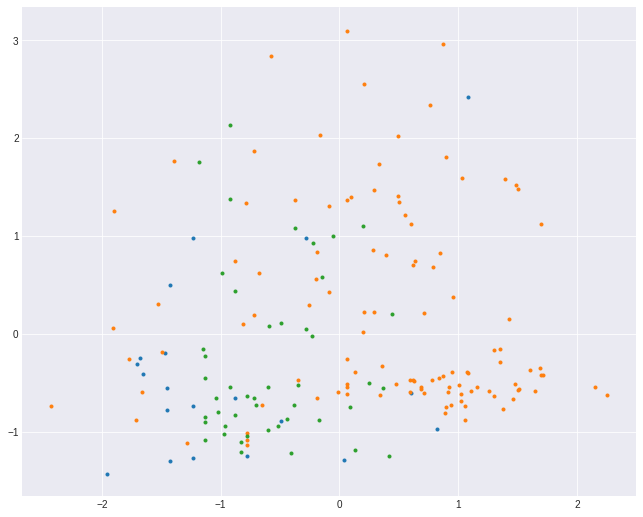

In [27]:
fig = plt.figure(figsize=(11, 9))
for i in range(3):
    plt.scatter(normalized[normalized['class MinMax'] == i ]['Alcohol'],
               normalized[normalized['class MinMax'] == i ]['Malic acid'],
               marker='.')
plt.show()

### 3-D

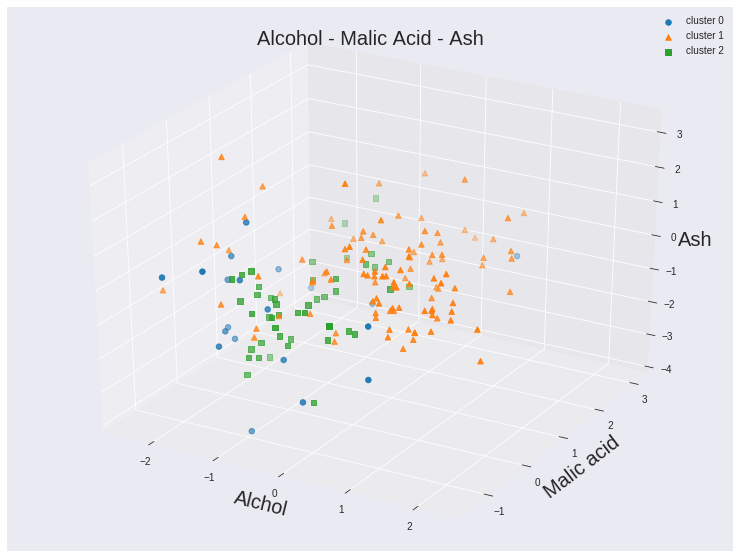

In [28]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d', )

for i,m in [(0,'o'), (1,'^'),(2,'s')]:
    lab= 'cluster '+str(i)
    ax.scatter(normalized[normalized['class MinMax'] == i ]['Alcohol'],
               normalized[normalized['class MinMax'] == i ]['Malic acid'],
               normalized[normalized['class MinMax'] == i ]['Ash'], 
               marker=m, label=lab, s=30)

plt.title('Alcohol - Malic Acid - Ash', size=20)
plt.legend()

ax.set_xlabel('Alchol', size=20)
ax.set_ylabel('Malic acid', size=20)
ax.set_zlabel('Ash', size=20)

plt.show()

## Task 3 Bonus Clustering - Implement K-means in Map Reduce!

In [102]:
def kMeans_Map_Reduce(k, n_iter, normalized, centroids):

    distances=dict()
    for k in range(178):
        # d is the distance of each point from the three clusters (d=[distance_from_cluster1, distance_from_cluster2, distance_from_cluster3])
        d=[]
        for i in range(3):      
            X=list(normalized.loc[k])
            dist_point_center=sum(clustering_lib.square(clustering_lib.difference(X, centroids[i])))

            d.append(dist_point_center)
        distances[k]=d
    clusters={i:[] for i in range(3)}
    
    
    for el in distances.keys():
        ii=distances[el].index(min(distances[el]))
        clusters[ii].append(list(normalized.loc[el]))
    
    for _ in range(n_iter):
        new_centers= clustering_lib.move_centers(clusters)
        clusters= clustering_lib.update_clusters(new_centers, normalized)
    
    map_reduce=[]
    for i in range(3):
        for j in range(len(clusters[i])):
            for k in range(len(normalized)):
                if list(normalized.iloc[k])== clusters[i][j]:
                    map_reduce.append([new_centers[i],k])
                
    return map_reduce

In [103]:
centroidss= clustering_lib.choose_centroids(normalized, K)  # centroids are a list in which elements is the list of coordinates of each center
map_reduce = kMeans_Map_Reduce(3, 100, normalized, centroidss)

In [108]:
len(map_reduce)

178

Map_reduce is a list of list:

each element is structured in this way (as above) :
- 1st element = list with the coordinates of its clusters,
- 2nd element = an integer, the index of the row in the  dataframe (normalized) that contains the point 

In [107]:
map_reduce[0]

[[0.7787310378209822,
  -0.3283519186881975,
  0.2934796948657505,
  -0.6240354925124106,
  0.6537064759285917,
  0.8341843341512428,
  0.9300730934355255,
  -0.5723344380670693,
  0.6173048006007309,
  0.13919395010756735,
  0.48693966545523415,
  0.7562191474545187,
  1.085677602153276,
  0.0,
  0.078125,
  1.078125],
 0]

# Task 4. K-means can go wrong!

You might know that k-means performances are significantly conditioned by its initialization. Provide an example that shows that with wrong initialization, the cost of the solution produced by the k-means algorithm can be arbitrarily larger from the cost of the optimal solution. You can either code it, or explain it in a clear text file.

In [1]:
# Import the necessary libraries

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import clustering_lib
import time
import warnings
warnings.filterwarnings('ignore')

Some necessary functions:

In [2]:
def predicted_clust(data,cluster):
    clu=[]
    for i in range(len(data)):
        for j in range(3):
            if list(data.loc[i]) in cluster[j]:
                clu.append(j)
    return clu

def actual_clust():
    with open('wine.data', 'r') as f:
        data= list(f.readlines())

    for i in range(len(data)):
        data[i]= data[i][:-1]
        data[i]= list(map(float, data[i].split(',')))

    features=['Target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
            'OD280/OD315 of diluted wines','Proline']

    wine= pd.DataFrame(data, columns=features)

    lista = list(wine["Target"])
    for i in range(len(lista)):
        if int(lista[i])==1:
            lista[i]=0    
        elif int(lista[i])==2:
            lista[i]=1   
        elif int(lista[i])==3:
            lista[i]=2    

    return lista

def print_result(data):
    actual = data["actual"]
    predicted = data["predicted"]
    acc = accuracy_score(actual, predicted)
    summary = classification_report(actual, predicted)
    results = confusion_matrix(actual, predicted) 
    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score: ',acc)
    print ('Summary : ')
    print (summary)

- We are going to compare performance of Built-in K-means function our group has been build, with Kmeans++ function with sklearn library. 

The metrics that we are going to check are:
1. **Time Execution: running time for each K-means functions (implementing randomize centroid selection)** 
2. **Performance of Clustering: in this case we make a confussion matrix for both K-means and calculate the accuray for each K-means** 

- Prepare the data for both clustering

In [3]:
dataf = clustering_lib.get_data('wine.data')
K=3  #K to be decided with the elbow method
# For built-in Kmeans function:
normalized= clustering_lib.normalize(dataf)
centroids= clustering_lib.choose_centroids(normalized, K)

# For K-means++
normalized2 = clustering_lib.normalize(dataf)

- Now Lets run both K-means and see the execution time for both

In [4]:
# Built-in K-means
cluster1 = clustering_lib.kMeans(3,1000,normalized, centroids)


# K-means++
start2 = time.time()
cluster2 = KMeans(n_clusters = 3, init = 'k-means++', n_init = 1000).fit(normalized2)
end2 = time.time()
print('Excecution Time Kmeans++: ', end2-start2)

Execution time:  78.42767572402954
Excecution Time Kmeans++:  1.6024348735809326


**We can see with the same sampling number, cluster choosen, and same normalization: Kmean++ run lot faster than built-in Kmeans (randomize initialization centroid)**

- Now we prepare the actual and predicted classes to compare the result of clustering

In [5]:
# Getting predicted and actual cluster from build in Kmeans
normalized["predicted"] = predicted_clust(normalized, cluster1)
normalized["actual"] = actual_clust()

# Getting predicted and actual cluster from Kmeans++
normalized2["predicted"] = cluster2.predict(normalized2)
normalized2["actual"] = actual_clust()

check the result

In [9]:
normalized2.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,predicted,actual
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0,0


In Kmeans++, the function label the predicted cluster assign the label of the cluster abritarily, so in this case we can see, compare to actual value, the mapping of the predicted cluster as follow (for this particular running):
+ 2 -> 1
+ 1 -> 2

So we need to tranform the label of the predicted cluster in kmeans++ before we measure the performance


In [7]:
res = normalized2['predicted']
for k, v in enumerate(res):
    if v == 2: res[k] = 1
    elif v == 1: res[k] = 2




Now we can measure the performance of both Kmeans by looking at confusion matrix and calculate the accuracy


In [8]:
# For built-in Kmeans
print_result(normalized)

# For Kmeans++
print_result(normalized2)

Confusion Matrix :
[[59  0  0]
 [ 5 63  3]
 [ 0  0 48]]
Accuracy Score:  0.9550561797752809
Summary : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        59
           1       1.00      0.89      0.94        71
           2       0.94      1.00      0.97        48

    accuracy                           0.96       178
   macro avg       0.95      0.96      0.96       178
weighted avg       0.96      0.96      0.95       178

Confusion Matrix :
[[59  0  0]
 [ 3 65  3]
 [ 0  0 48]]
Accuracy Score:  0.9662921348314607
Summary : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.92      0.96        71
           2       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



**From the result we can see that Kmeans++ have better succes rate (accuracy) of the clustering, therefore we can conclude that kmeans performance conditioned by its initialization. With wrong initialization it can cost the algorithm (in this case the running time) since it tooks longer to reach the convergance of the clustering process.**